In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('merctrain.csv',usecols=['y','X0','X1','X2','X3','X6'])
df.head()

,y,X0,X1,X2,X3,X6
0,130.81,k,v,at,a,j
1,88.53,k,t,av,e,l
2,76.26,az,w,n,c,j
3,80.62,az,t,n,f,l
4,78.02,az,v,n,f,d


In [3]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [4]:
num_list=[col for col in df.columns if(is_numeric_dtype(df[col]))]
num_list

['y']

#### We can see that the target variable(y) is a numeric variable 

In [5]:
cat_list=[col for col in df.columns if(is_string_dtype(df[col]))]
cat_list

['X0', 'X1', 'X2', 'X3', 'X6']

#### We can see that all the explanatory variables(X's) are continuous variables

In [6]:
for col in df.columns:
    print("The number of missing values in {} is:{}".format(col,df[col].isnull().sum()))

The number of missing values in y is:0
The number of missing values in X0 is:0
The number of missing values in X1 is:0
The number of missing values in X2 is:0
The number of missing values in X3 is:0
The number of missing values in X6 is:0


#### From above code we can conclude that there are no null values in the columns which we are using. Let us proceed to inspect the values that each of these variables take

Text(0.5, 1.0, 'y')

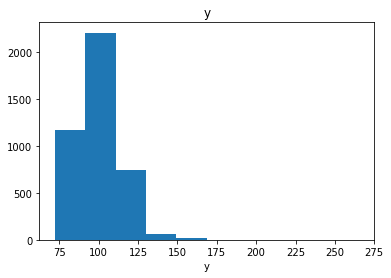

In [7]:
plt.hist(df['y'])
plt.xlabel('y')
plt.title('y')

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'y')

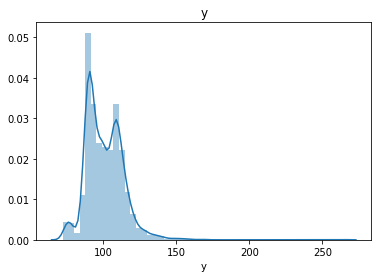

In [8]:
sns.distplot(df['y'],kde=True,hist=True)
plt.xlabel('y')
plt.title('y')

In [9]:
for col in cat_list:
    print("The proportion of values present in {} is:{}".format(col,df[col].value_counts()/len(df)))

The proportion of values present in X0 is:z     0.085531
ak    0.082918
y     0.076978
ay    0.074364
t     0.072701
x     0.071276
o     0.063911
f     0.053932
n     0.046329
w     0.043241
j     0.043003
az    0.041578
aj    0.035876
s     0.025184
ap    0.024471
h     0.017819
d     0.017344
al    0.015918
v     0.008553
af    0.008316
ai    0.008078
m     0.008078
e     0.007603
ba    0.006415
at    0.005940
a     0.004989
ax    0.004514
am    0.004277
aq    0.004277
i     0.004277
u     0.004039
aw    0.003801
l     0.003801
ad    0.003326
au    0.002613
k     0.002613
b     0.002613
as    0.002376
r     0.002376
bc    0.001426
ao    0.000950
c     0.000713
aa    0.000475
q     0.000475
ac    0.000238
ab    0.000238
g     0.000238
Name: X0, dtype: float64
The proportion of values present in X1 is:aa    0.197909
s     0.142077
b     0.140651
l     0.140176
v     0.096935
r     0.059634
i     0.048230
a     0.033975
c     0.028748
o     0.019482
w     0.012354
z     0.010929
u     

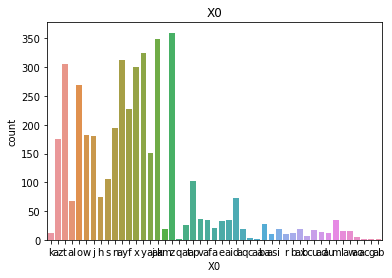

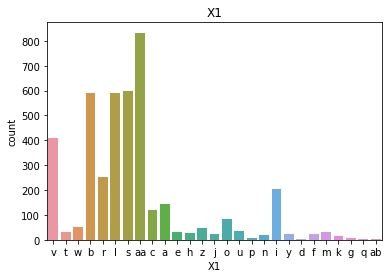

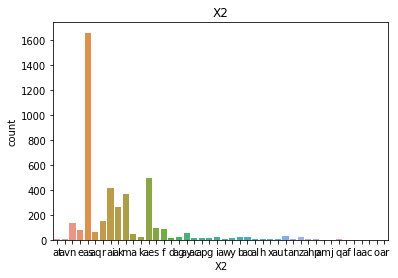

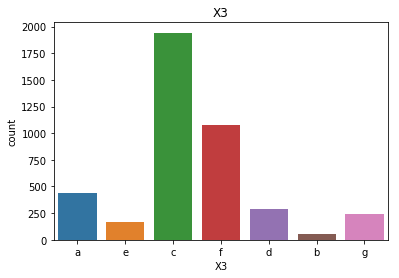

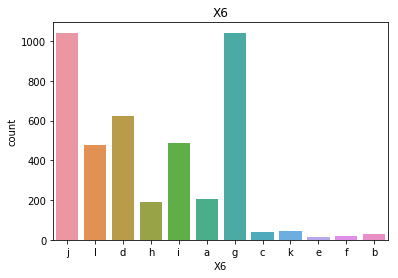

In [10]:
for col in cat_list:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

#### Here we can see that few of the labels contain very less counts of the data points. This is established both descreptively and visually

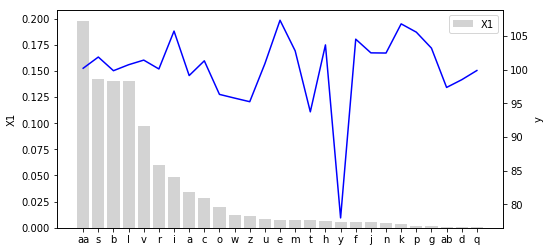

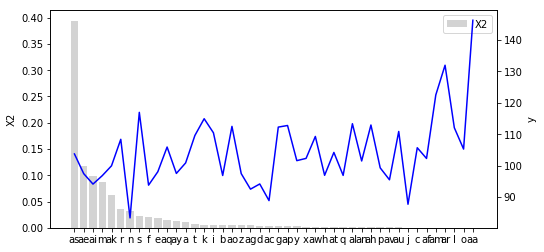

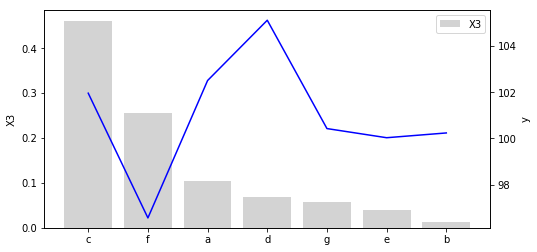

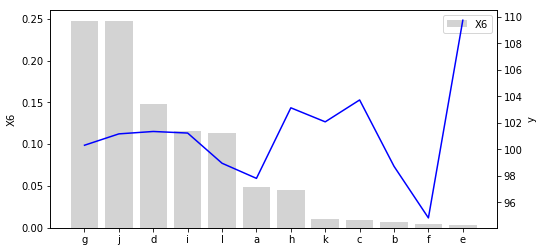

In [11]:
for col in ['X1','X2','X3','X6']:
    df1=df.copy()
    df1=pd.Series(df[col].value_counts())/len(df)
    df1=df1.reset_index()
    df1.columns=[col,col+'_percs']
    df1=df1.merge(df.groupby([col])['y'].mean().reset_index(),on=col,how="left")
    df1.columns
    fig,ax=plt.subplots(figsize=(8,4))
    plt.xticks(df1.index,df1[col],rotation=0)
    ax2=ax.twinx()
    ax.bar(df1.index,df1[col+'_percs'],color="lightgrey",label=col)
    ax2.plot(df1.index,df1['y'],color="blue")
    ax.set_ylabel(col)
    ax2.set_ylabel('y')
    ax.legend()
    plt.show()

In [12]:
for col in ['X1','X2','X3','X6']:
    df1=pd.Series(df[col].value_counts()/len(df))
    df1.reset_index()
    tempdf=df1[df1>=0.1]
    grouping_dict={k: ('rare' if k not in tempdf.index else k) for k in df1.index}
    df[col+'_grouped']=df[col].map(grouping_dict)
df.head()

,y,X0,X1,X2,X3,X6,X1_grouped,X2_grouped,X3_grouped,X6_grouped
0,130.81,k,v,at,a,j,rare,rare,a,j
1,88.53,k,t,av,e,l,rare,rare,rare,l
2,76.26,az,w,n,c,j,rare,rare,c,j
3,80.62,az,t,n,f,l,rare,rare,f,l
4,78.02,az,v,n,f,d,rare,rare,f,d


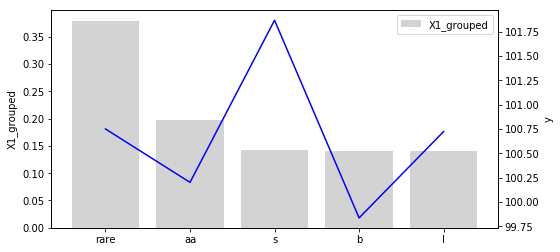

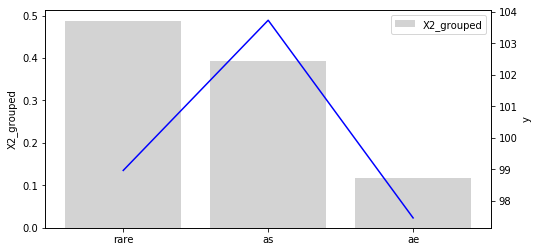

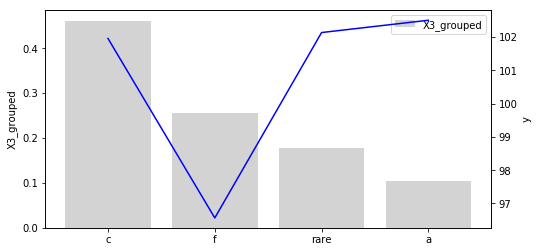

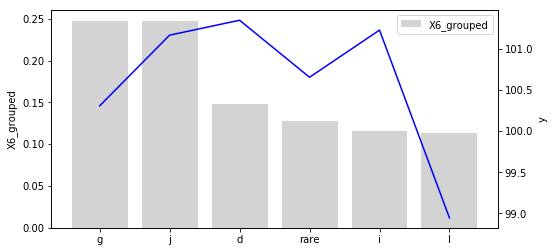

In [13]:
for col in ['X1_grouped','X2_grouped','X3_grouped','X6_grouped']:
    df1=pd.Series(df[col].value_counts())/len(df)
    df1=df1.reset_index()
    df1.columns=[col,col+'_perc']
    df1=df1.merge(df.groupby([col])['y'].mean().reset_index(),on=col,how="left")
    #print(df1.head())
    fig,ax=plt.subplots(figsize=(8,4))
    plt.xticks(df1.index,df1[col],rotation=0)
    ax2=ax.twinx()
    ax.bar(df1.index,df1[col+'_perc'],color="lightgrey",label=col)
    ax2.plot(df1.index,df1['y'],color="blue")
    ax.set_ylabel(col)
    ax2.set_ylabel('y')
    ax.legend()
    plt.show()

In [14]:
df=pd.read_csv('titanictest.csv')
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

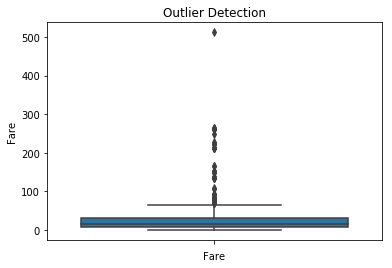

In [18]:
sns.boxplot(df['Fare'],orient="v")
plt.xlabel("Fare")
plt.title("Outlier Detection")
plt.show()

In [19]:
from pandas.api.types import is_float_dtype
from collections import defaultdict
#from scipy.stats import iqr
outliers=defaultdict(list)
num_list=list()
for col in df.columns:
    if(col=="Fare"):
        num_list.append(col)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        #q75, q25 = iqr(df[col])
        #iqr = q75 - q25
        #print(col, ":" ,IQR)
        #for i in range(0,len(num_list)+1):
        for index, row in df.iterrows():
            if((row[col]<(Q1-3*IQR)) or (row[col]>(Q3+3*IQR))):
                    outliers[col].append(row[col])
                #else:
                    
for key,values in outliers.items():
    print("The number of strong outliers present in {} is:{}".format(key,len(values)))
    for i in values:
        print(i)

The number of strong outliers present in Fare is:31
262.375
263.0
262.375
262.375
263.0
211.5
211.5
221.7792
221.7792
151.55
262.375
221.7792
247.5208
134.5
227.525
164.8667
211.5
106.425
134.5
136.7792
136.7792
151.55
135.6333
146.5208
211.3375
512.3292
134.5
262.375
164.8667
211.5
108.9


In [20]:
df[df["Fare"]>=106.425]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
141,1033,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S
